In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
#Загрузка данных
questions_df = pd.read_csv('/Users/marinasemushina/Desktop/dz3/questions.csv')
lectures_df = pd.read_csv('/Users/marinasemushina/Desktop/dz3/lectures.csv')
train_df = pd.read_csv('/Users/marinasemushina/Desktop/dz3/train.csv',nrows=10000000)

In [84]:
# Просмотр первых нескольких строк каждого датасета
train_df.head()


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [85]:
questions_df.head()


,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [86]:
lectures_df.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [87]:
# Основные статистики для train_df
train_df.describe()


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,9.765216e+06
mean,5.000000e+06,7.546528e+09,1.079943e+08,5.209509e+03,1.953960e-02,8.776194e+02,1.376462e+00,6.262029e-01,2.547559e+04
std,2.886751e+06,1.141381e+10,6.311024e+07,3.867783e+03,1.384117e-01,1.334407e+03,1.193603e+00,5.226395e-01,1.995033e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,2.500000e+06,5.109600e+08,5.398177e+07,2.059000e+03,0.000000e+00,1.020000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,5.000000e+06,2.612310e+09,1.067638e+08,5.016000e+03,0.000000e+00,3.710000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,7.499999e+06,9.751909e+09,1.630735e+08,7.402000e+03,0.000000e+00,1.055000e+03,3.000000e+00,1.000000e+00,2.966600e+04
max,9.999999e+06,8.470816e+10,2.167479e+08,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


In [88]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 762.9+ MB


In [89]:
# Основные статистики для questions_df

questions_df.describe()

,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


In [90]:
questions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [91]:
# Основные статистики для lectures_df

lectures_df.describe()

,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


In [92]:
lectures_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


In [93]:
# Проверка пропущенных значений
train_df.isnull().sum()

row_id                                 0
timestamp                              0
user_id                                0
content_id                             0
content_type_id                        0
task_container_id                      0
user_answer                            0
answered_correctly                     0
prior_question_elapsed_time       234784
prior_question_had_explanation     39388
dtype: int64

In [94]:
questions_df.isnull().sum()

question_id       0
bundle_id         0
correct_answer    0
part              0
tags              1
dtype: int64

In [95]:
lectures_df.isnull().sum()

lecture_id    0
tag           0
part          0
type_of       0
dtype: int64

In [96]:
# Объединение train_df с questions_df
train_questions_df = pd.merge(train_df, questions_df, left_on='content_id', right_on='question_id', how='left')

In [97]:
# Объединение train_questions_df с lectures_df
train_questions_lectures_df = pd.merge(train_questions_df, lectures_df, left_on='content_id', right_on='lecture_id', how='left')

In [98]:
# Просмотр первых нескольких строк объединенного датасета
train_questions_lectures_df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,correct_answer,part_x,tags,lecture_id,tag,part_y,type_of
0,0,0,115,5692,0,1,3,1,NaN,NaN,5692.0,5692.0,3.0,5.0,151,NaN,NaN,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False,5716.0,5716.0,2.0,5.0,168,NaN,NaN,NaN,NaN
2,2,118363,115,128,0,0,0,1,55000.0,False,128.0,128.0,0.0,1.0,131 149 92,NaN,NaN,NaN,NaN
3,3,131167,115,7860,0,3,0,1,19000.0,False,7860.0,7860.0,0.0,1.0,131 104 81,NaN,NaN,NaN,NaN
4,4,137965,115,7922,0,4,1,1,11000.0,False,7922.0,7922.0,1.0,1.0,131 149 92,NaN,NaN,NaN,NaN


In [99]:
# Обработка пропущенных значений
train_questions_lectures_df['prior_question_elapsed_time'].fillna(0, inplace=True)
train_questions_lectures_df['prior_question_had_explanation'].fillna(False, inplace=True)
train_questions_lectures_df['part_y'].fillna(0, inplace=True)
train_questions_lectures_df['tag'].fillna(0, inplace=True)
train_questions_lectures_df['type_of'].fillna('unknown', inplace=True)

# Проверка после обработки

train_questions_lectures_df.isnull().sum()

row_id                                  0
timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time             0
prior_question_had_explanation          0
question_id                        118946
bundle_id                          118946
correct_answer                     118946
part_x                             118946
tags                               118946
lecture_id                        9675185
tag                                     0
part_y                                  0
type_of                                 0
dtype: int64

In [100]:
# Список столбцов с числовыми данными, в которых есть пропуски
numeric_columns_with_nan = ['question_id', 'bundle_id', 'correct_answer', 'part_x', 'lecture_id']

# Замена пропущенных значений на медиану для каждого столбца
for column in numeric_columns_with_nan:
    median_value = train_questions_lectures_df[column].median()
    train_questions_lectures_df[column].fillna(median_value, inplace=True)

# Проверка после обработки
print(train_questions_lectures_df.isnull().sum())

row_id                                 0
timestamp                              0
user_id                                0
content_id                             0
content_type_id                        0
task_container_id                      0
user_answer                            0
answered_correctly                     0
prior_question_elapsed_time            0
prior_question_had_explanation         0
question_id                            0
bundle_id                              0
correct_answer                         0
part_x                                 0
tags                              118946
lecture_id                             0
tag                                    0
part_y                                 0
type_of                                0
dtype: int64


In [102]:
# Группировка данных по user_id и вычисление среднего времени ответа
grouped_user_time = train_questions_lectures_df.groupby('user_id')['prior_question_elapsed_time'].mean()
print("Average time to answer questions by user:")
print(grouped_user_time.head())

Average time to answer questions by user:
user_id
115     19499.978261
124     18166.566667
2746    16250.000000
5382    34921.875000
8623    25175.000000
Name: prior_question_elapsed_time, dtype: float64


In [117]:
#Группировка по task_container_id и answered_correctly и вычисление среднего процента правильных ответов 
grouped_task_correct = train_questions_lectures_df.groupby('task_container_id')['answered_correctly'].mean()
print("\nAverage correctness by task container:")
print(grouped_task_correct.head())


Average correctness by task container:
task_container_id
0    0.680675
1    0.528523
2    0.436121
3    0.543857
4    0.481446
Name: answered_correctly, dtype: float64


In [119]:
#Распределение тегов вопросов
tag_distribution = train_questions_lectures_df['tag'].value_counts()
print("Distribution of question tags:")
print(tag_distribution)

Distribution of question tags:
tag
0.0      9676581
39.0       13548
161.0       9147
27.0        7995
62.0        7900
          ...   
143.0         84
103.0         80
150.0         72
83.0          65
137.0         30
Name: count, Length: 151, dtype: int64


На диаграмме ниже видим, что общее количество правильных ответов выше, чем неправильных. Также можем вывести топ-10 content_id с наибольшим количеством правильных/неправильных ответов.

Количество правильных ответов: 6457425
Количество неправильных ответов: 3347179


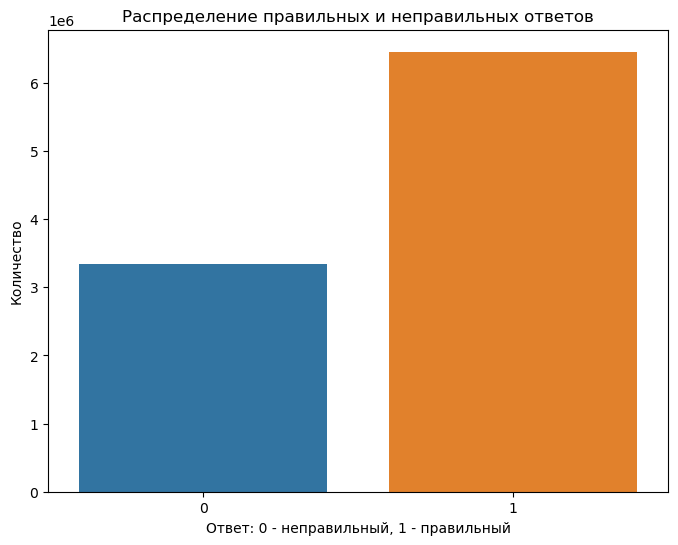

In [126]:
# Замена -1 на NaN
train_questions_lectures_df['answered_correctly'] = train_questions_lectures_df['answered_correctly'].replace(-1, pd.NA)
#Распределение правильных и неправильных ответов
correct_answers = train_questions_lectures_df[train_questions_lectures_df['answered_correctly'] == 1]
incorrect_answers = train_questions_lectures_df[train_questions_lectures_df['answered_correctly'] == 0]

print("Количество правильных ответов:", len(correct_answers))
print("Количество неправильных ответов:", len(incorrect_answers))

# Визуализация распределения
plt.figure(figsize=(8, 6))
sns.countplot(x='answered_correctly', data=train_questions_lectures_df.dropna(subset=['answered_correctly']))
plt.title('Распределение правильных и неправильных ответов')
plt.xlabel('Ответ: 0 - неправильный, 1 - правильный')
plt.ylabel('Количество')
plt.show()

In [129]:
# Топ-10 content_id с наибольшим количеством правильных ответов
top_correct_content_ids = correct_answers['content_id'].value_counts().head(10)
print("Топ-10 content_id с наибольшим количеством правильных ответов:")
print(top_correct_content_ids)

Топ-10 content_id с наибольшим количеством правильных ответов:
content_id
7900     14866
294      11503
2065     11264
2064     11242
1278     11074
10684    10939
10687    10867
10685    10260
10688    10013
7218      9718
Name: count, dtype: int64


In [130]:
# Топ-10 content_id с наибольшим количеством неправильных ответов
top_incorrect_content_ids = incorrect_answers['content_id'].value_counts().head(10)
print("\nТоп-10 content_id с наибольшим количеством неправильных ответов:")
print(top_incorrect_content_ids)


Топ-10 content_id с наибольшим количеством неправильных ответов:
content_id
6116    15163
2063    14646
4120    14284
6173    14107
2946    13027
2948    12980
2947    12616
175     12466
3363    12288
3365    11983
Name: count, dtype: int64


Также мы можем посмотреть как наличие объяснений влияет на правильность ответов. При отсутствии объяснений количество правильных ответов ниже

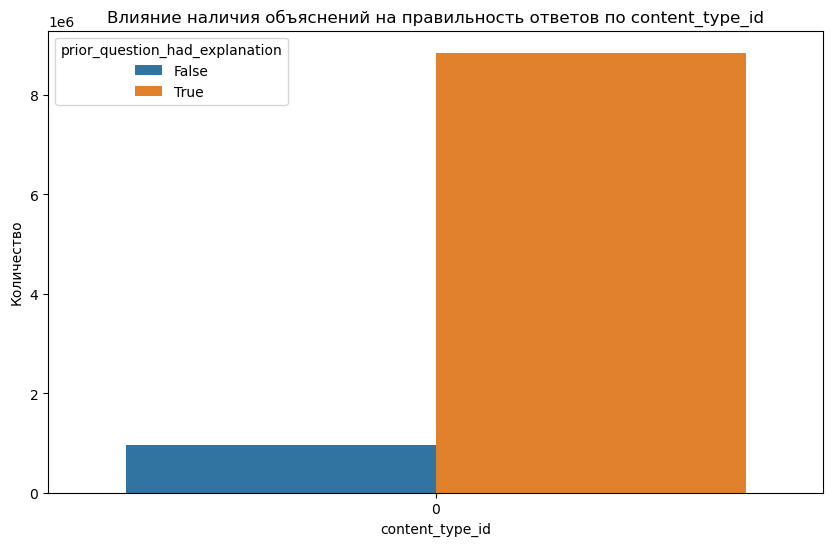

In [138]:
#Посмотрим, как наличие объяснений(prior_question_had_explanation) влияет на правильность ответов в зависимости от content_type_id.

plt.figure(figsize=(10, 6))
sns.countplot(x='content_type_id', hue='prior_question_had_explanation', data=train_questions_lectures_df.dropna(subset=['answered_correctly']))
plt.title('Влияние наличия объяснений на правильность ответов по content_type_id')
plt.xlabel('content_type_id')
plt.ylabel('Количество')
plt.show()

Мы можем посмотреть влияет ли время ответа на его правильность. Видно, что не влияет.

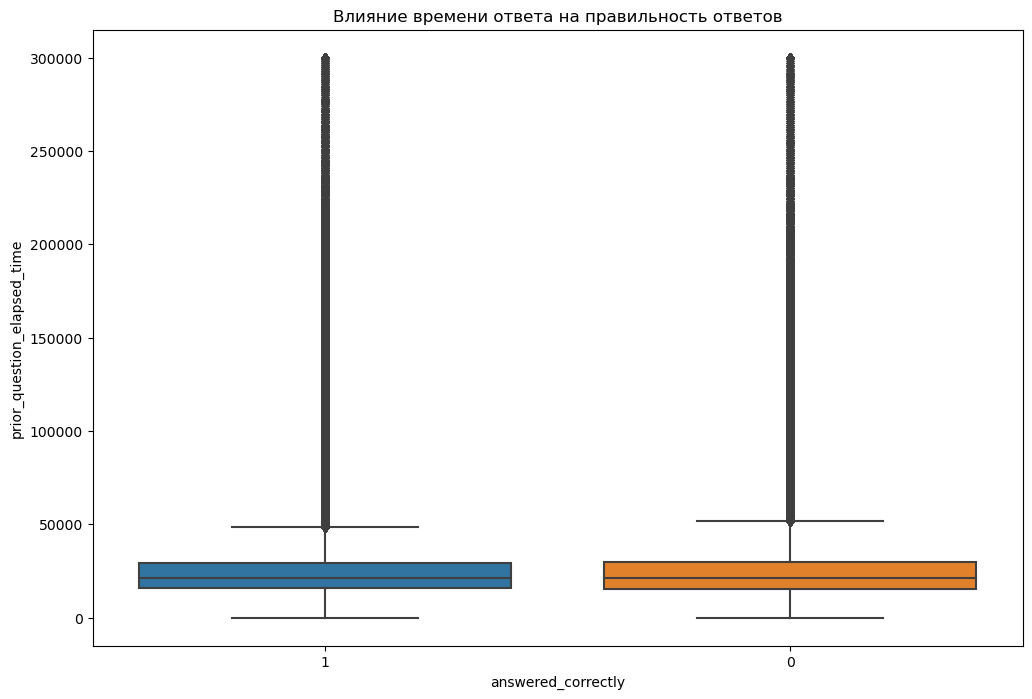

In [141]:
#Анализ времени ответа (prior_question_elapsed_time)
#Посмотрим, как время ответа влияет на правильность ответов.

plt.figure(figsize=(12, 8))
sns.boxplot(x='answered_correctly', y='prior_question_elapsed_time', data=train_questions_lectures_df)
plt.title('Влияние времени ответа на правильность ответов')
plt.show()

Также видим, что среднее время ответа также не отличается для правильных и неправильных ответов 


Mean Elapsed Time by Correct Answer:
answered_correctly
0    25607.533458
1    25251.812365
Name: prior_question_elapsed_time, dtype: float64


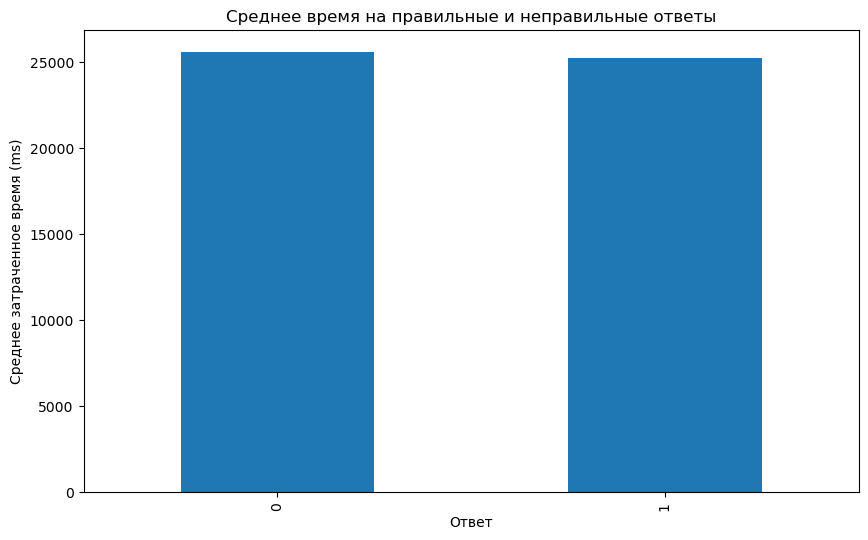

In [144]:
# Среднее время на правильные и неправильные ответы
mean_elapsed_time = train_questions_lectures_df.groupby('answered_correctly')['prior_question_elapsed_time'].mean()
print("\nMean Elapsed Time by Correct Answer:")
print(mean_elapsed_time)

# Построение графика
mean_elapsed_time.plot(kind='bar', figsize=(10, 6))
plt.title('Среднее время на правильные и неправильные ответы')
plt.xlabel('Ответ')
plt.ylabel('Среднее затраченное время (ms)')
plt.show()

Можно посмотреть распределение времени на предыдущие вопросы


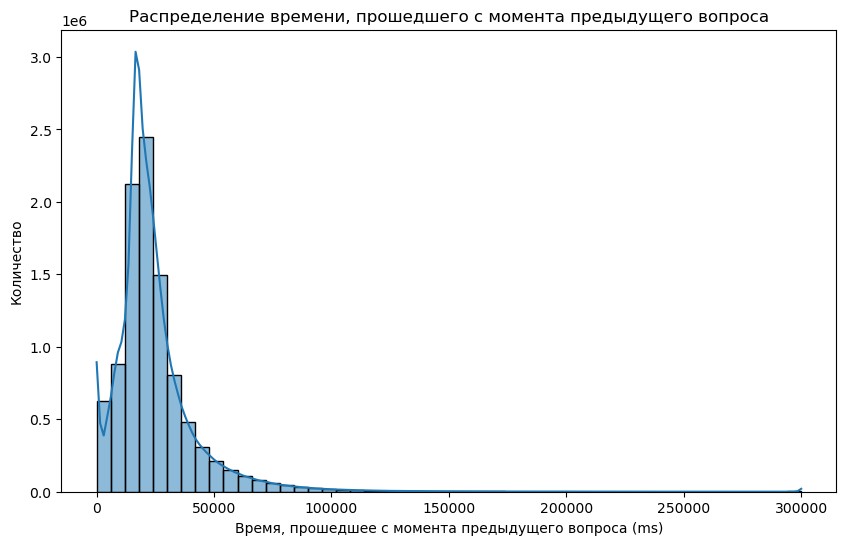

In [164]:
# Распределение времени на предыдущие вопросы
plt.figure(figsize=(10, 6))
sns.histplot(train_questions_lectures_df['prior_question_elapsed_time'].dropna(), bins=50, kde=True)
plt.title('Распределение времени, прошедшего с момента предыдущего вопроса')
plt.xlabel('Время, прошедшее с момента предыдущего вопроса (ms)')
plt.ylabel('Количество')
plt.show()

Мы можем посмотреть среднюю успеваемость в зависимости от объяснений. Наличие объяснений увеличивает среднюю успеваемость.

prior_question_had_explanation
False    0.507825
True     0.674771
Name: answered_correctly, dtype: object


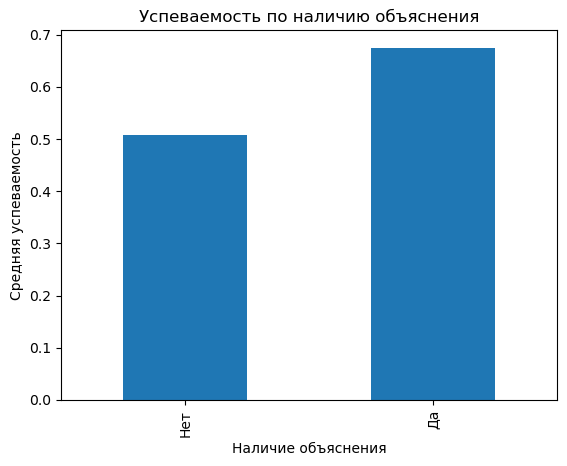

In [150]:
# Группировка данных по наличию объяснения и расчет средней успеваемости
explanation_performance = train_questions_lectures_df.groupby('prior_question_had_explanation')['answered_correctly'].mean()
print(explanation_performance)

# Визуализация
explanation_performance.plot(kind='bar', title='Успеваемость по наличию объяснения')
plt.xlabel('Наличие объяснения')
plt.ylabel('Средняя успеваемость')
plt.xticks([0, 1], ['Нет', 'Да'])
plt.show()

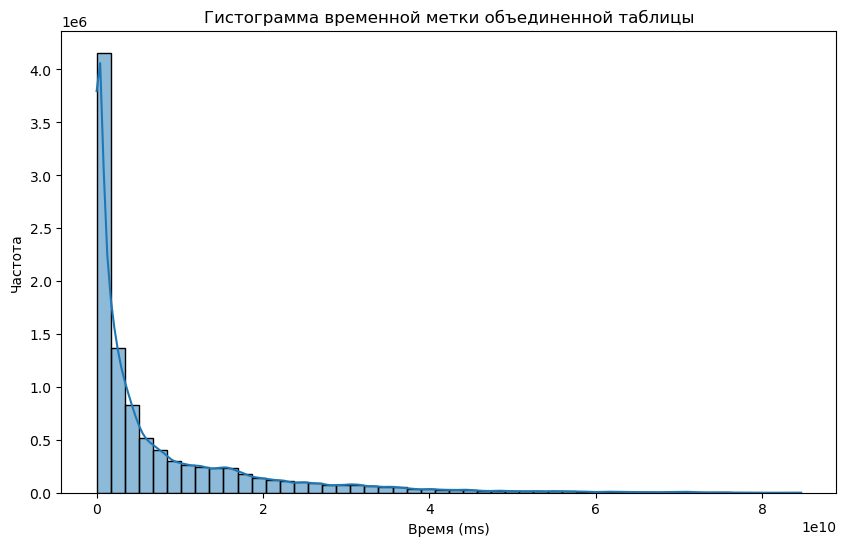

In [158]:
# Визуализация данных в объединенной таблице
plt.figure(figsize=(10, 6))
sns.histplot(train_questions_lectures_df['timestamp'], bins=50, kde=True)
plt.title('Гистограмма временной метки объединенной таблицы')
plt.xlabel('Время (ms)')
plt.ylabel('Частота')
plt.show()

In [160]:
# Исключение строк с answered_correctly == -1
train_questions_lectures_df = train_questions_lectures_df[train_questions_lectures_df['answered_correctly'] != -1]
# Исключение нечисловых столбцов
numeric_columns = train_questions_lectures_df.select_dtypes(include=['number']).columns
train_questions_lectures_df = train_questions_lectures_df[numeric_columns]

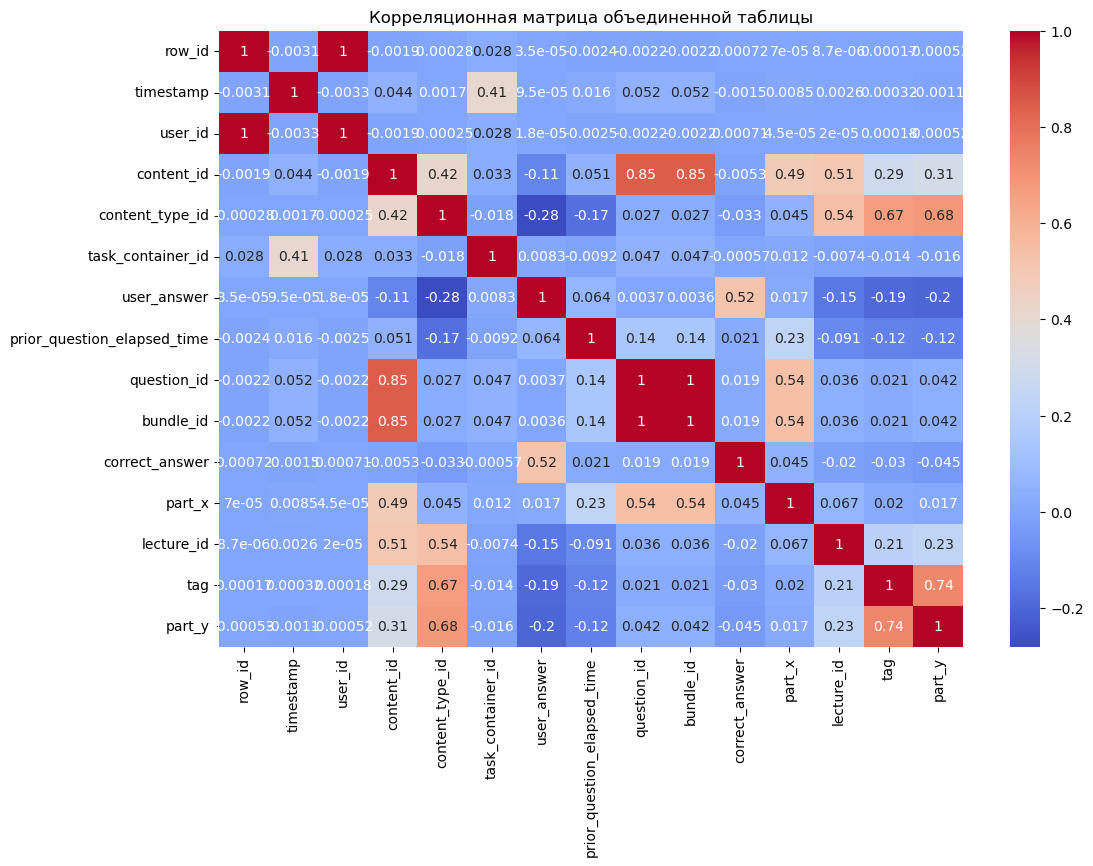

In [161]:
# Вычисление корреляционной матрицы
corr_matrix_full = train_questions_lectures_df.corr()

# Построение тепловой карты корреляционной матрицы
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_full, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица объединенной таблицы')
plt.show()

In [ ]:
Т.о. мы проанализировали характеристики, влияющие на успеваемость студентов
